# MPS using the deesse wrapper - using a mask

## Import what is required

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# import from package 'geone'
from geone import img
import geone.imgplot as imgplt
import geone.customcolors as ccol
import geone.deesseinterface as dsi

## Training image (TI)
Read the training image.

In [2]:
ti = img.readImageGslib('ti.gslib')

Plot the image (using the function `imgplt.drawImage2D`).

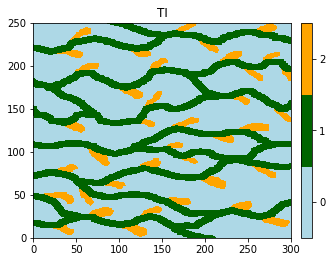

In [3]:
col = ['lightblue', 'darkgreen', 'orange']

plt.figure(figsize=(5,5))
imgplt.drawImage2D(ti, categ=True, categCol=col, title='TI')

## Simulation grid and mask
Deesse requires a regular cartesian grid. However, one can specify to deesse to not simulate every cell in the simulation grid. For that, a mask is used: a value (`0` or `1`) is attached to each simulation grid cell indicating that the cell must be simulated (value `1`) or not (value `0`). These values are passed to deesse by an array.

In [4]:
# Read the mask (image) from the file 'mask.gslib'
mask = img.readImageGslib('mask.gslib')

# Set the simulation grid
nx, ny, nz = mask.nx, mask.ny, mask.nz
sx, sy, sz = mask.sx, mask.sy, mask.sz
ox, oy, oz = mask.ox, mask.oy, mask.oz

# Set mask values to simulation grid cells (1: cell to be simulated)
mask_value = mask.val

## Fill the input structure for deesse and launch deesse

In [5]:
deesse_input = dsi.DeesseInput(
    nx=nx, ny=ny, nz=nz,
    sx=sx, sy=sy, sz=sz,
    ox=ox, oy=oy, oz=oz,
    nv=1, varname='categ',
    nTI=1, TI=ti,
    mask=mask_value,          # set mask
    distanceType=0,
    nneighboringNode=24,
    distanceThreshold=0.05,
    maxScanFraction=0.25,
    npostProcessingPathMax=1,
    seed=444,
    nrealization=1)

deesse_output = dsi.deesseRun(deesse_input)

********************************************************************************
DEESSE VERSION 3.2 / BUILD NUMBER 20200213
********************************************************************************
DONE


### Display the "mask" and the simulation

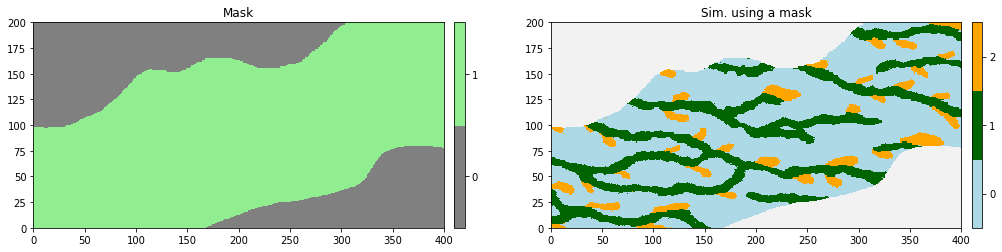

In [6]:
# Retrieve the result
sim = deesse_output['sim']

# Display
plt.subplots(1, 2, figsize=(17,5)) # 1 x 2 sub-plots

# ... the mask
plt.subplot(1, 2, 1)
imgplt.drawImage2D(mask, categ=True, categCol=['gray', 'lightgreen'], title='Mask')

# ... the simulation
plt.subplot(1, 2, 2)
imgplt.drawImage2D(sim[0], categ=True, categCol=col, title='Sim. using a mask')